In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
train_data = pd.read_csv(r'E:/数据分析数据集/DataTrain/DataTrain/A_train.csv')
train_data.head()

,no,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,ProductInfo_1,UserInfo_5,UserInfo_6,ProductInfo_2,UserInfo_7,...,UserInfo_264,UserInfo_265,ProductInfo_214,UserInfo_266,UserInfo_267,ProductInfo_215,ProductInfo_216,UserInfo_268,UserInfo_269,UserInfo_270
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,1,NaN,3177.0,NaN,NaN,NaN,193.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,2,NaN,2710.0,0.0,0.0,0.0,103.0,0.0,0.0,0.0,...,1.0,9.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,400000.0
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,4,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN


In [3]:
train_data = train_data.drop('no',axis=1)

In [4]:
train_data.head()

,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,ProductInfo_1,UserInfo_5,UserInfo_6,ProductInfo_2,UserInfo_7,ProductInfo_3,...,UserInfo_264,UserInfo_265,ProductInfo_214,UserInfo_266,UserInfo_267,ProductInfo_215,ProductInfo_216,UserInfo_268,UserInfo_269,UserInfo_270
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,NaN,3177.0,NaN,NaN,NaN,193.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,NaN,2710.0,0.0,0.0,0.0,103.0,0.0,0.0,0.0,0.0,...,1.0,9.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,400000.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 490 entries, UserInfo_1 to UserInfo_270
dtypes: float64(489), int64(1)
memory usage: 149.5 MB


In [6]:
# 两个数据类型为int64的字段，flag为标签
train_data.dtypes[train_data.dtypes == 'int64']

flag    int64
dtype: object

In [7]:
columns = train_data.columns

In [8]:
Web,Product,User = [],[],[]
for x in columns:
    if x.__contains__('Web') == True:
        Web.append(x)
    elif x.__contains__('Product') == True:
        Product.append(x)
    elif x.__contains__('User') == True:
        User.append(x)

In [9]:
Web

['WebInfo_1', 'WebInfo_2', 'WebInfo_3']

In [10]:
Product

['ProductInfo_1',
 'ProductInfo_2',
 'ProductInfo_3',
 'ProductInfo_4',
 'ProductInfo_5',
 'ProductInfo_6',
 'ProductInfo_7',
 'ProductInfo_8',
 'ProductInfo_9',
 'ProductInfo_10',
 'ProductInfo_11',
 'ProductInfo_12',
 'ProductInfo_13',
 'ProductInfo_14',
 'ProductInfo_15',
 'ProductInfo_16',
 'ProductInfo_17',
 'ProductInfo_18',
 'ProductInfo_19',
 'ProductInfo_20',
 'ProductInfo_21',
 'ProductInfo_22',
 'ProductInfo_23',
 'ProductInfo_24',
 'ProductInfo_25',
 'ProductInfo_26',
 'ProductInfo_27',
 'ProductInfo_28',
 'ProductInfo_29',
 'ProductInfo_30',
 'ProductInfo_31',
 'ProductInfo_32',
 'ProductInfo_33',
 'ProductInfo_34',
 'ProductInfo_35',
 'ProductInfo_36',
 'ProductInfo_37',
 'ProductInfo_38',
 'ProductInfo_39',
 'ProductInfo_40',
 'ProductInfo_41',
 'ProductInfo_42',
 'ProductInfo_43',
 'ProductInfo_44',
 'ProductInfo_45',
 'ProductInfo_46',
 'ProductInfo_47',
 'ProductInfo_48',
 'ProductInfo_49',
 'ProductInfo_50',
 'ProductInfo_51',
 'ProductInfo_52',
 'ProductInfo_53',
 '

In [11]:
User

['UserInfo_1',
 'UserInfo_2',
 'UserInfo_3',
 'UserInfo_4',
 'UserInfo_5',
 'UserInfo_6',
 'UserInfo_7',
 'UserInfo_8',
 'UserInfo_9',
 'UserInfo_10',
 'UserInfo_11',
 'UserInfo_12',
 'UserInfo_13',
 'UserInfo_14',
 'UserInfo_15',
 'UserInfo_16',
 'UserInfo_17',
 'UserInfo_18',
 'UserInfo_19',
 'UserInfo_20',
 'UserInfo_21',
 'UserInfo_22',
 'UserInfo_23',
 'UserInfo_24',
 'UserInfo_25',
 'UserInfo_26',
 'UserInfo_27',
 'UserInfo_28',
 'UserInfo_29',
 'UserInfo_30',
 'UserInfo_31',
 'UserInfo_32',
 'UserInfo_33',
 'UserInfo_34',
 'UserInfo_35',
 'UserInfo_36',
 'UserInfo_37',
 'UserInfo_38',
 'UserInfo_39',
 'UserInfo_40',
 'UserInfo_41',
 'UserInfo_42',
 'UserInfo_43',
 'UserInfo_44',
 'UserInfo_45',
 'UserInfo_46',
 'UserInfo_47',
 'UserInfo_48',
 'UserInfo_49',
 'UserInfo_50',
 'UserInfo_51',
 'UserInfo_52',
 'UserInfo_53',
 'UserInfo_54',
 'UserInfo_55',
 'UserInfo_56',
 'UserInfo_57',
 'UserInfo_58',
 'UserInfo_59',
 'UserInfo_60',
 'UserInfo_61',
 'UserInfo_62',
 'UserInfo_63',
 

In [12]:
data = [len(Web),len(Product),len(User)]

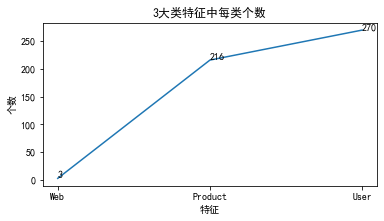

In [13]:
fig,ax = plt.subplots(1,figsize=(6,3))
ax.plot(np.arange(3),data)
ax.set_ylabel('个数')
ax.set_xlabel('特征')
ax.set_title('3大类特征中每类个数')
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['Web','Product','User'])
for a,b in zip(np.arange(3),data):
    ax.text(a,b,b)
plt.show()

In [14]:
# 看Web数据分布
train_data[Web].describe().T

,count,mean,std,min,25%,50%,75%,max
WebInfo_1,1952.0,1.530738,0.514354,0.0,1.0,2.0,2.0,2.0
WebInfo_2,25064.0,0.383099,7.612874,0.0,0.0,0.0,0.0,647.0
WebInfo_3,8136.0,2.375246,0.696940,0.0,2.0,2.0,3.0,3.0


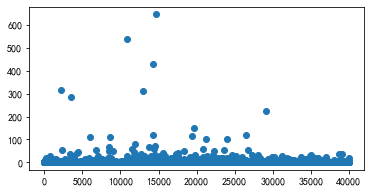

In [15]:
fig,ax = plt.subplots(1,figsize = (6,3))
ax.scatter(np.arange(len(train_data['WebInfo_2'].values)),train_data['WebInfo_2'].values)
plt.show()

In [16]:
train_data['WebInfo_2'].value_counts()

0.0      24120
1.0        276
2.0        173
3.0         96
4.0         72
         ...  
39.0         1
286.0        1
36.0         1
315.0        1
226.0        1
Name: WebInfo_2, Length: 67, dtype: int64

In [17]:
# 看User数据分布
train_data[User].describe().T

,count,mean,std,min,25%,50%,75%,max
UserInfo_1,104.0,3860.527115,6008.354045,0.0,605.02,1855.14,4630.65,50000.00
UserInfo_2,9100.0,22167.107813,78961.300196,0.0,0.00,5874.21,20056.98,2552859.51
UserInfo_3,25064.0,9038.851660,23343.892405,-1567.0,0.00,0.00,0.00,240000.00
UserInfo_4,25064.0,367.044845,12678.073360,0.0,0.00,0.00,0.00,600000.00
UserInfo_5,10116.0,1708.900455,1777.404664,1.0,426.00,950.00,2337.00,7540.00
...,...,...,...,...,...,...,...,...
UserInfo_266,25064.0,0.011052,0.130057,0.0,0.00,0.00,0.00,6.00
UserInfo_267,1300.0,10.386154,185.295449,0.0,1.00,2.00,5.00,6662.00
UserInfo_268,24093.0,323.107440,7957.963357,0.0,0.00,0.00,0.00,686789.39
UserInfo_269,25064.0,1951.347352,23315.719767,0.0,0.00,0.00,0.00,1903892.60


In [18]:
# 看product数据分布
train_data[Product].describe().T

,count,mean,std,min,25%,50%,75%,max
ProductInfo_1,25064.0,0.001037,0.032192,0.0,0.0,0.0,0.0,1.0
ProductInfo_2,25064.0,0.000279,0.016710,0.0,0.0,0.0,0.0,1.0
ProductInfo_3,25064.0,0.000040,0.006316,0.0,0.0,0.0,0.0,1.0
ProductInfo_4,25064.0,0.291813,0.454606,0.0,0.0,0.0,1.0,1.0
ProductInfo_5,25064.0,0.019071,0.136778,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
ProductInfo_212,25064.0,0.000080,0.008933,0.0,0.0,0.0,0.0,1.0
ProductInfo_213,25064.0,0.009695,0.097988,0.0,0.0,0.0,0.0,1.0
ProductInfo_214,25064.0,0.009097,0.094944,0.0,0.0,0.0,0.0,1.0
ProductInfo_215,25064.0,0.000040,0.006316,0.0,0.0,0.0,0.0,1.0


In [19]:
train_data['ProductInfo_1'].value_counts()

0.0    25038
1.0       26
Name: ProductInfo_1, dtype: int64

In [20]:
# 分析可以得出可以将所有的Product看成分类数据，并且是经过独热编码的，Web和User字段数据分布范围较广看成连续型数据

In [21]:
# 对Product处理缺失值(用0填补)
train_data[Product] = train_data[Product].fillna(0)

In [22]:
# 对Web和User处理缺失值（用均值填补）
impmean = SimpleImputer(missing_values=np.nan,strategy='mean')
impmean = impmean.fit(train_data[Web+User] )
train_data[Web+User] = impmean.transform(train_data[Web+User] )

In [23]:
train_data.head()

,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,ProductInfo_1,UserInfo_5,UserInfo_6,ProductInfo_2,UserInfo_7,ProductInfo_3,...,UserInfo_264,UserInfo_265,ProductInfo_214,UserInfo_266,UserInfo_267,ProductInfo_215,ProductInfo_216,UserInfo_268,UserInfo_269,UserInfo_270
0,3860.527115,22167.107813,9038.85166,367.044845,0.0,1708.900455,0.583626,0.0,21354.124042,0.0,...,0.009895,4.046162,0.0,0.011052,10.386154,0.0,0.0,0.0,1951.347352,194470.286134
1,3860.527115,3177.000000,9038.85166,367.044845,0.0,193.000000,0.583626,0.0,21354.124042,0.0,...,0.009895,4.046162,0.0,0.011052,10.386154,0.0,0.0,0.0,1951.347352,194470.286134
2,3860.527115,2710.000000,0.00000,0.000000,0.0,103.000000,0.000000,0.0,0.000000,0.0,...,1.000000,9.000000,0.0,0.000000,10.386154,0.0,0.0,0.0,0.000000,400000.000000
3,3860.527115,22167.107813,9038.85166,367.044845,0.0,1708.900455,0.583626,0.0,21354.124042,0.0,...,0.009895,4.046162,0.0,0.011052,10.386154,0.0,0.0,0.0,1951.347352,194470.286134
4,3860.527115,22167.107813,0.00000,0.000000,0.0,1708.900455,0.000000,0.0,0.000000,0.0,...,0.000000,2.000000,0.0,0.000000,10.386154,0.0,0.0,0.0,0.000000,194470.286134


In [24]:
train_data['flag'].isnull().sum()

0

In [25]:
data_Web = pd.DataFrame(train_data['WebInfo_2'].value_counts())

In [26]:
index_Web = data_Web[data_Web.WebInfo_2 == 1].index

In [27]:
for x in index_Web:
    if train_data['WebInfo_2'].__contains__(x)==True:
        train_data.drop(train_data[train_data['WebInfo_2']==x].index.values[0],axis=0,inplace=True)

In [28]:
train_data

,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,ProductInfo_1,UserInfo_5,UserInfo_6,ProductInfo_2,UserInfo_7,ProductInfo_3,...,UserInfo_264,UserInfo_265,ProductInfo_214,UserInfo_266,UserInfo_267,ProductInfo_215,ProductInfo_216,UserInfo_268,UserInfo_269,UserInfo_270
0,3860.527115,22167.107813,9038.85166,367.044845,0.0,1708.900455,0.583626,0.0,21354.124042,0.0,...,0.009895,4.046162,0.0,0.011052,10.386154,0.0,0.0,0.00000,1951.347352,194470.286134
1,3860.527115,3177.000000,9038.85166,367.044845,0.0,193.000000,0.583626,0.0,21354.124042,0.0,...,0.009895,4.046162,0.0,0.011052,10.386154,0.0,0.0,0.00000,1951.347352,194470.286134
2,3860.527115,2710.000000,0.00000,0.000000,0.0,103.000000,0.000000,0.0,0.000000,0.0,...,1.000000,9.000000,0.0,0.000000,10.386154,0.0,0.0,0.00000,0.000000,400000.000000
3,3860.527115,22167.107813,9038.85166,367.044845,0.0,1708.900455,0.583626,0.0,21354.124042,0.0,...,0.009895,4.046162,0.0,0.011052,10.386154,0.0,0.0,0.00000,1951.347352,194470.286134
4,3860.527115,22167.107813,0.00000,0.000000,0.0,1708.900455,0.000000,0.0,0.000000,0.0,...,0.000000,2.000000,0.0,0.000000,10.386154,0.0,0.0,0.00000,0.000000,194470.286134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,3860.527115,22167.107813,9038.85166,367.044845,0.0,1708.900455,0.583626,0.0,21354.124042,0.0,...,0.009895,4.046162,0.0,0.011052,10.386154,0.0,0.0,323.10744,1951.347352,194470.286134
39996,3860.527115,22167.107813,0.00000,0.000000,0.0,1708.900455,0.000000,0.0,0.000000,0.0,...,0.000000,1.000000,0.0,0.000000,10.386154,0.0,0.0,0.00000,0.000000,194470.286134
39997,3860.527115,22167.107813,9038.85166,367.044845,0.0,1708.900455,0.583626,0.0,21354.124042,0.0,...,0.009895,4.046162,0.0,0.011052,10.386154,0.0,0.0,323.10744,1951.347352,194470.286134
39998,3860.527115,0.000000,0.00000,0.000000,0.0,2511.000000,0.000000,0.0,0.000000,0.0,...,0.000000,4.000000,0.0,0.000000,10.386154,0.0,0.0,0.00000,0.000000,194470.286134


In [29]:
train_data.index = np.arange(train_data.shape[0])

In [30]:
sd = StandardScaler()

In [31]:
train_data = pd.concat([pd.DataFrame(sd.fit_transform(train_data[Web+User]),columns=Web+User),train_data[Product],train_data['flag']],axis=1)

In [32]:
train_data.head()

,WebInfo_1,WebInfo_2,WebInfo_3,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,UserInfo_5,UserInfo_6,UserInfo_7,...,ProductInfo_208,ProductInfo_209,ProductInfo_210,ProductInfo_211,ProductInfo_212,ProductInfo_213,ProductInfo_214,ProductInfo_215,ProductInfo_216,flag
0,-0.000027,0.075205,0.000129,-5.963801e-15,0.000730,-0.000282,-0.000027,0.000131,0.001709,-0.000206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,-0.000027,0.075205,0.000129,-5.963801e-15,-0.508584,-0.000282,-0.000027,-1.697683,0.001709,-0.000206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-0.000027,-0.185715,0.000129,-5.963801e-15,-0.521109,-0.489355,-0.036588,-1.798484,-0.065580,-0.624884,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,-0.000027,0.075205,0.000129,-5.963801e-15,0.000730,-0.000282,-0.000027,0.000131,0.001709,-0.000206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,-0.000027,-0.185715,0.000129,-5.963801e-15,0.000730,-0.489355,-0.036588,0.000131,-0.065580,-0.624884,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [33]:
train_data.to_csv(r'E:/数据分析数据集/DataTrain/train_data.csv')

- 模型预测

In [34]:
import numpy as np
import pandas as pd

In [35]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from xgboost import XGBClassifier as XGBC
from sklearn.ensemble import StackingClassifier

In [36]:
train_data = pd.read_csv(r'E:/数据分析数据集/DataTrain/train_data.csv',index_col=0)

In [37]:
train_data.head()

,WebInfo_1,WebInfo_2,WebInfo_3,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,UserInfo_5,UserInfo_6,UserInfo_7,...,ProductInfo_208,ProductInfo_209,ProductInfo_210,ProductInfo_211,ProductInfo_212,ProductInfo_213,ProductInfo_214,ProductInfo_215,ProductInfo_216,flag
0,-0.000027,0.075205,0.000129,-5.963801e-15,0.000730,-0.000282,-0.000027,0.000131,0.001709,-0.000206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,-0.000027,0.075205,0.000129,-5.963801e-15,-0.508584,-0.000282,-0.000027,-1.697683,0.001709,-0.000206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-0.000027,-0.185715,0.000129,-5.963801e-15,-0.521109,-0.489355,-0.036588,-1.798484,-0.065580,-0.624884,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,-0.000027,0.075205,0.000129,-5.963801e-15,0.000730,-0.000282,-0.000027,0.000131,0.001709,-0.000206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,-0.000027,-0.185715,0.000129,-5.963801e-15,0.000730,-0.489355,-0.036588,0.000131,-0.065580,-0.624884,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [38]:
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

In [39]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=520)

In [40]:
svc = SVC().fit(Xtrain,Ytrain)
svc.score(Xtest,Ytest)

0.871820532065716

0.871820532065716
0.871820532065716
0.871820532065716
0.8719039279459595
0.871820532065716


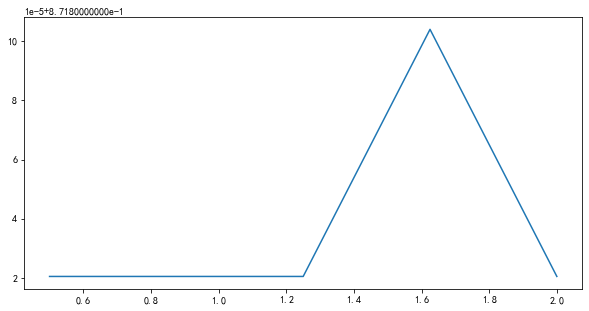

In [41]:
C = np.linspace(0.5,2,5)
scores = []
for c in C:
    svc = SVC(C=c).fit(Xtrain,Ytrain)
    score = svc.score(Xtest,Ytest)
    print(score)
    scores.append(score)
plt.figure(figsize=(10,5))
plt.plot(C,scores)
plt.show()

In [42]:
print(max(scores),C[scores.index(max(scores))])

0.8719039279459595 1.625


In [43]:
svc = SVC(C=1.625).fit(Xtrain,Ytrain)
svc.score(Xtest,Ytest)

0.8719039279459595

In [44]:
def plot(x,y,title):
    plt.figure(figsize=(10,5))
    plt.plot(x,y)
    plt.title(title)
    plt.xticks(x)
    plt.show()

0.8719039279459595
0.8713201567842549
0.872320907347177
0.869402051538654
0.869402051538654
0.872320907347177 liblinear


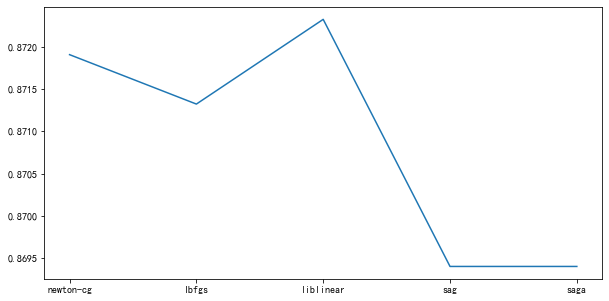

In [49]:
solvers = ['newton-cg','lbfgs','liblinear','sag','saga']
scores=[]
for solver in solvers:
    lr = LR(solver=solver).fit(Xtrain,Ytrain)
    print(lr.score(Xtest,Ytest))
    scores.append(lr.score(Xtest,Ytest))
print(max(scores),solvers[scores.index(max(scores))])
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(len(solvers)),scores)
ax.set_xticks(np.arange(len(solvers)))
ax.set_xticklabels(solvers)
plt.show()

0.872320907347177
0.872320907347177
0.872320907347177
0.872320907347177
0.872320907347177
0.872320907347177
0.872320907347177
0.872320907347177
0.872320907347177
0.872320907347177
0.872320907347177 1.0


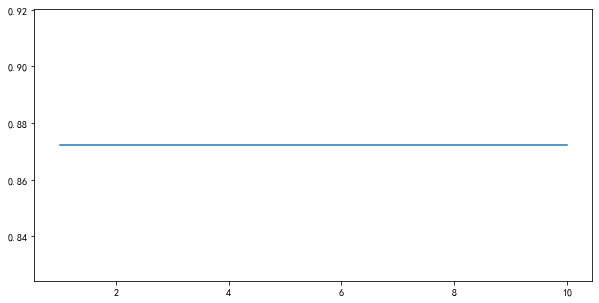

In [50]:
C = np.linspace(1,10,10)
scores = []
for c in C:
    lr = LR(C=c,solver='liblinear').fit(Xtrain,Ytrain)
    score = lr.score(Xtest,Ytest)
    print(score)
    scores.append(score)
print(max(scores),C[scores.index(max(scores))])
plt.figure(figsize=(10,5))
plt.plot(C,scores)
plt.show()

In [51]:
estimators = [('SVC', SVC(C=1.625)),('LR', LR(solver='liblinear'))]

In [52]:
cl= StackingClassifier(estimators=estimators,final_estimator=XGBC(random_state=42))

In [53]:
cl.fit(Xtrain,Ytrain).score(Xtest,Ytest)

[20:28:23] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8706529897423068

In [54]:
import pickle
pickle.dump(cl,open("xgboost_cl.dat","wb"))
# loaded_model = pickle.load(open("xgboostonboston.dat", "rb"))

In [55]:
test_data = pd.read_csv(r'E:/数据分析数据集/DataTrain/DataTrain/B_test.csv')
test_data.head()

,no,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,ProductInfo_1,UserInfo_5,UserInfo_6,ProductInfo_2,UserInfo_7,...,UserInfo_264,UserInfo_265,ProductInfo_214,UserInfo_266,UserInfo_267,ProductInfo_215,ProductInfo_216,UserInfo_268,UserInfo_269,UserInfo_270
0,5124,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN
1,14114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9301,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN


In [56]:
Web

['WebInfo_1', 'WebInfo_2', 'WebInfo_3']

In [57]:
User

['UserInfo_1',
 'UserInfo_2',
 'UserInfo_3',
 'UserInfo_4',
 'UserInfo_5',
 'UserInfo_6',
 'UserInfo_7',
 'UserInfo_8',
 'UserInfo_9',
 'UserInfo_10',
 'UserInfo_11',
 'UserInfo_12',
 'UserInfo_13',
 'UserInfo_14',
 'UserInfo_15',
 'UserInfo_16',
 'UserInfo_17',
 'UserInfo_18',
 'UserInfo_19',
 'UserInfo_20',
 'UserInfo_21',
 'UserInfo_22',
 'UserInfo_23',
 'UserInfo_24',
 'UserInfo_25',
 'UserInfo_26',
 'UserInfo_27',
 'UserInfo_28',
 'UserInfo_29',
 'UserInfo_30',
 'UserInfo_31',
 'UserInfo_32',
 'UserInfo_33',
 'UserInfo_34',
 'UserInfo_35',
 'UserInfo_36',
 'UserInfo_37',
 'UserInfo_38',
 'UserInfo_39',
 'UserInfo_40',
 'UserInfo_41',
 'UserInfo_42',
 'UserInfo_43',
 'UserInfo_44',
 'UserInfo_45',
 'UserInfo_46',
 'UserInfo_47',
 'UserInfo_48',
 'UserInfo_49',
 'UserInfo_50',
 'UserInfo_51',
 'UserInfo_52',
 'UserInfo_53',
 'UserInfo_54',
 'UserInfo_55',
 'UserInfo_56',
 'UserInfo_57',
 'UserInfo_58',
 'UserInfo_59',
 'UserInfo_60',
 'UserInfo_61',
 'UserInfo_62',
 'UserInfo_63',
 

In [58]:
Product

['ProductInfo_1',
 'ProductInfo_2',
 'ProductInfo_3',
 'ProductInfo_4',
 'ProductInfo_5',
 'ProductInfo_6',
 'ProductInfo_7',
 'ProductInfo_8',
 'ProductInfo_9',
 'ProductInfo_10',
 'ProductInfo_11',
 'ProductInfo_12',
 'ProductInfo_13',
 'ProductInfo_14',
 'ProductInfo_15',
 'ProductInfo_16',
 'ProductInfo_17',
 'ProductInfo_18',
 'ProductInfo_19',
 'ProductInfo_20',
 'ProductInfo_21',
 'ProductInfo_22',
 'ProductInfo_23',
 'ProductInfo_24',
 'ProductInfo_25',
 'ProductInfo_26',
 'ProductInfo_27',
 'ProductInfo_28',
 'ProductInfo_29',
 'ProductInfo_30',
 'ProductInfo_31',
 'ProductInfo_32',
 'ProductInfo_33',
 'ProductInfo_34',
 'ProductInfo_35',
 'ProductInfo_36',
 'ProductInfo_37',
 'ProductInfo_38',
 'ProductInfo_39',
 'ProductInfo_40',
 'ProductInfo_41',
 'ProductInfo_42',
 'ProductInfo_43',
 'ProductInfo_44',
 'ProductInfo_45',
 'ProductInfo_46',
 'ProductInfo_47',
 'ProductInfo_48',
 'ProductInfo_49',
 'ProductInfo_50',
 'ProductInfo_51',
 'ProductInfo_52',
 'ProductInfo_53',
 '

In [59]:
test_data[Product] = test_data[Product].fillna(0)

In [60]:
impmean = SimpleImputer(missing_values=np.nan,strategy='mean')
impmean = impmean.fit(test_data[Web+User] )
test_data[Web+User] = impmean.transform(test_data[Web+User] )

In [61]:
test_data.head()

,no,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,ProductInfo_1,UserInfo_5,UserInfo_6,ProductInfo_2,UserInfo_7,...,UserInfo_264,UserInfo_265,ProductInfo_214,UserInfo_266,UserInfo_267,ProductInfo_215,ProductInfo_216,UserInfo_268,UserInfo_269,UserInfo_270
0,5124,11451.485,6775.943121,0.000000,0.000000,0.0,1008.225746,0.000000,0.0,0.000000,...,0.000000,4.00000,0.0,0.000000,3.958333,0.0,0.0,0.000000,0.000000,171092.018868
1,14114,11451.485,6775.943121,2725.901105,408.041159,0.0,1008.225746,0.325267,0.0,5858.422256,...,0.002858,2.43045,0.0,0.002668,3.958333,0.0,0.0,80.697285,169.909461,171092.018868
2,3390,11451.485,6775.943121,2725.901105,408.041159,0.0,1008.225746,0.325267,0.0,5858.422256,...,0.002858,2.43045,0.0,0.002668,3.958333,0.0,0.0,80.697285,169.909461,171092.018868
3,9010,11451.485,6775.943121,2725.901105,408.041159,0.0,1008.225746,0.325267,0.0,5858.422256,...,0.002858,2.43045,0.0,0.002668,3.958333,0.0,0.0,80.697285,169.909461,171092.018868
4,9301,11451.485,6775.943121,0.000000,0.000000,0.0,1008.225746,0.000000,0.0,0.000000,...,0.000000,2.00000,0.0,0.000000,3.958333,0.0,0.0,0.000000,0.000000,171092.018868


In [62]:
sd = StandardScaler()
test_data = pd.concat([pd.DataFrame(sd.fit_transform(test_data[Web+User]),columns=Web+User),test_data[Product],test_data['no']],axis=1)

In [63]:
test_data.head()

,WebInfo_1,WebInfo_2,WebInfo_3,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,UserInfo_5,UserInfo_6,UserInfo_7,...,ProductInfo_208,ProductInfo_209,ProductInfo_210,ProductInfo_211,ProductInfo_212,ProductInfo_213,ProductInfo_214,ProductInfo_215,ProductInfo_216,no
0,0.0,-1.519761e-01,3.555752e-15,1.420522e-14,0.0,-3.534717e-01,-2.756415e-02,-9.019955e-16,-0.079119,-4.120221e-01,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5124
1,0.0,1.959029e-17,3.555752e-15,1.420522e-14,0.0,-5.896777e-17,3.839908e-18,-9.019955e-16,0.000000,6.396464e-17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14114
2,0.0,1.959029e-17,3.555752e-15,1.420522e-14,0.0,-5.896777e-17,3.839908e-18,-9.019955e-16,0.000000,6.396464e-17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3390
3,0.0,1.959029e-17,3.555752e-15,1.420522e-14,0.0,-5.896777e-17,3.839908e-18,-9.019955e-16,0.000000,6.396464e-17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9010
4,0.0,-1.519761e-01,3.555752e-15,1.420522e-14,0.0,-3.534717e-01,-2.756415e-02,-9.019955e-16,-0.079119,-4.120221e-01,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9301


In [64]:
test_data['pred'] = cl.predict(test_data.iloc[:,:-1])

In [79]:
test_data.iloc[:,489:491].T

,0,1,2,3,4,5,6,7,8,9,...,13453,13454,13455,13456,13457,13458,13459,13460,13461,13462
no,5124,14114,3390,9010,9301,16502,14257,3857,5338,16854,...,16203,12964,11215,7795,3097,9736,11522,2457,10016,8837
pred,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
test_data['pred'].sum()

102

In [80]:
test_data.to_csv(r'E:/数据分析数据集/DataTrain/DataTrain/test_data.csv')

In [66]:
submit = cl.predict_proba(test_data.iloc[:,:-2])

In [67]:
submit[:,0]

array([0.9405503 , 0.8788523 , 0.7775666 , ..., 0.88773835, 0.8318325 ,
       0.80074346], dtype=float32)

In [68]:
submit = pd.concat([test_data['no'],pd.Series(submit[:,0])],axis=1)

In [69]:
submit.columns = ['no','flag']

In [70]:
submit

,no,flag
0,5124,0.940550
1,14114,0.878852
2,3390,0.777567
3,9010,0.880694
4,9301,0.741599
...,...,...
13458,9736,0.871954
13459,11522,0.881850
13460,2457,0.887738
13461,10016,0.831833


In [71]:
submit[['no','flag']].to_csv(r'E:/数据分析数据集/DataTrain/DataTrain/submit.csv')

In [73]:
np.linspace(0.5,2,5)

array([0.5  , 0.875, 1.25 , 1.625, 2.   ])